In [32]:
import sys, os
import argparse

sys.path.append("../../NPTFit/")

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import healpy as hp
from tqdm import *
from astropy.io import fits
import urllib.request

from NPTFit import nptfit # module for performing scan
from NPTFit import create_mask as cm # module for creating the mask
from NPTFit import psf_correction as pc # module for determining the PSF correction
from NPTFit import dnds_analysis # module for analysing the output

%matplotlib inline

In [ ]:
# Download 3FGL catalog
url = 'https://gist.githubusercontent.com/smsharma/4a96cacfda3dacc12c0b7a5d793f3450/raw/e59e27c4abf0ebd5923bd7b89f93fab13afbccdd/3fgl.dat'  
urllib.request.urlretrieve(url, '../data/3fgl.dat')  

In [18]:
def load_3FGL_data():

    # Load in the 3FGL catalog
    source_3fg_df = pd.read_csv('../data/3fgl.dat', sep='|', comment='#')

    # Remove whitespace from column names
    source_3fg_df.rename(columns=lambda x: x.strip(), inplace=True)
    for col in source_3fg_df.columns.values:
        try:
            source_3fg_df[col] = source_3fg_df[
                col].map(str.strip)
        except TypeError:
            continue

    # Convert to numeric data
    return source_3fg_df.convert_objects(
        convert_numeric=True)


In [19]:
source_3fg_df = load_3FGL_data()

/scratch/sm8383/anaconda3/envs/venv_smsharma/lib/python3.6/site-packages/ipykernel_launcher.py:17: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


In [23]:
l_ary = source_3fg_df['_Lii'].values
b_ary = source_3fg_df['_Bii'].values

In [28]:
nside = 128
mask_rad = 0.8 # Mask radius in degrees

mask = np.zeros(hp.nside2npix(nside))
for l, b in tqdm_notebook(zip(l_ary, b_ary)):
    mask += ~cm.make_mask_total(nside=nside, mask_ring = True, inner = 0, outer = mask_rad, ring_b = b, ring_l = l)

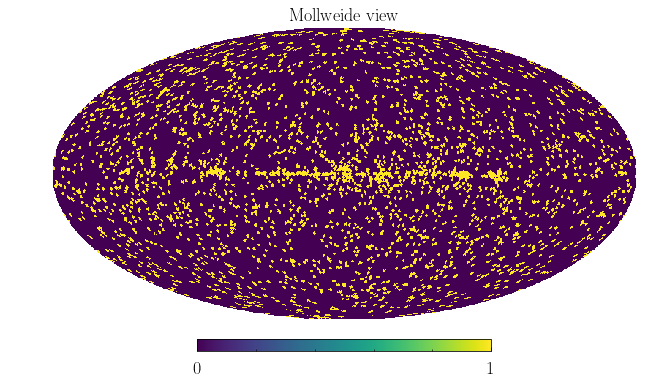

In [39]:
mask_3fgl = mask > 0
hp.mollview(mask_3fgl)

In [30]:
# Download 4FGL catalog
url = 'https://fermi.gsfc.nasa.gov/ssc/data/access/lat/8yr_catalog/gll_psc_v18.fit'  
urllib.request.urlretrieve(url, '../data/gll_psc_v18.fit')  

('../data/gll_psc_v18.fit', <http.client.HTTPMessage at 0x2abed6bd99b0>)

In [33]:
gll_psc_v18_fits = fits.open('../data/gll_psc_v18.fit')

In [37]:
b_4fgl_ary = gll_psc_v18_fits[1].data['GLAT']
l_4fgl_ary = gll_psc_v18_fits[1].data['GLON']

In [40]:
nside = 128
mask_rad = 0.8 # Mask radius in degrees

mask = np.zeros(hp.nside2npix(nside))
for l, b in tqdm_notebook(zip(l_4fgl_ary, b_4fgl_ary)):
    mask += ~cm.make_mask_total(nside=nside, mask_ring = True, inner = 0, outer = mask_rad, ring_b = b, ring_l = l)

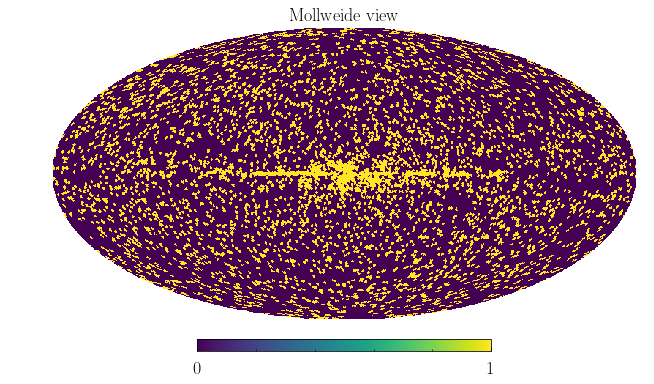

In [41]:
mask_4fgl = mask > 0
hp.mollview(mask_4fgl)

In [42]:
np.save("../data/mask_3fgl_0p8deg.npy", mask_3fgl)
np.save("../data/mask_4fgl_0p8deg.npy", mask_4fgl)